## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import calculate_average, Performance_metrics, Scatter_Violin_Plots, Merge_Multiple_Files

## Import Datasets

Import the bankfull independent evaluation dataset gathered from 11 sources: [Mulvihill et al., (2009)](https://doi.org/10.3133/sir20095144), [Keaton et al., (2005)](https://doi.org/10.3133/sir20055076), [Dutnell, (2000)](http://www.riverman-engineering.com/thesis-text.pdf), [Moody et al., (2003)](https://efotg.sc.egov.usda.gov/references/Public/AZ/Arid_SW_Report_Regional_Curves.pdf), [McCandless & Everett, (2002)](https://corpora.tika.apache.org/base/docs/govdocs1/308/308564.pdf), [Brockman, (2010)](https://uknowledge.uky.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1055&context=gradschool_theses), [Lotspeich, 2009](https://pubs.usgs.gov/publication/sir20095206), [Parola et al., (2007)](https://eec.ky.gov/Environmental-Protection/Water/Reports/Reports/NPS0010-Bluegrass.pdf), [Metcalf, (2004)](https://trid.trb.org/View/748355), [Chase, (2004)](https://pubs.er.usgs.gov/publication/ofr20041260), and [Mccandless, (2003)](https://www.researchgate.net/publication/237472244_Maryland_Stream_Survey_Bankfull_Discharge_and_Channel_Characteristics_in_the_Allegheny_Plateau_and_the_Valley_and_Ridge_Hydrologic_Region/stats)

In [2]:
df_IE_bnk= pd.read_csv('./ModelIndependentEvaluation/df_IE_bnk.csv', low_memory= False)
df_IE_bnk.rename(columns={"wdth_bnk_m": "bnk_width_obs", "dpth_bnk_m": "bnk_depth_obs"}, inplace=True)
df_IE_bnk = df_IE_bnk[['COMID', 'bnk_width_obs', 'bnk_depth_obs']]

Import the Regional Hydraulic Geometry Curves - Source: [Blackburn-Lynch et al., (2017)](https://doi.org/10.1111/1752-1688.12540)

In [3]:
df_pre_bnk_RHGC = pd.read_csv('./ModelIndependentEvaluation/RHGC_bankfull.txt', low_memory= False)
df_pre_bnk_RHGC.rename(columns={"BANKFULL_WIDTH": "bnk_width_pre_RHGC", "BANKFULL_DEPTH": "bnk_depth_pre_RHGC"}, inplace=True)
df_pre_bnk_RHGC = df_pre_bnk_RHGC[['COMID', 'bnk_width_pre_RHGC', 'bnk_depth_pre_RHGC']]

Import the developed dataset (Bankfull_Meanflow_CONUS dataset)

In [4]:
df_pre_bnk_mlrxgbr = pd.read_csv('./ModelApplication/Output/Bankfull_Meanflow_CONUS.txt', low_memory= False)
df_pre_bnk_mlrxgbr.rename(columns={"bnk_width": "bnk_width_pre_mlrxgb", "bnk_depth": "bnk_depth_pre_mlrxgb"}, inplace=True)
df_pre_bnk_mlrxgbr = df_pre_bnk_mlrxgbr[['COMID', 'bnk_width_pre_mlrxgb', 'bnk_depth_pre_mlrxgb']]

## Merge datasets

In [5]:
df_Final = Merge_Multiple_Files ([df_IE_bnk, df_pre_bnk_mlrxgbr, df_pre_bnk_RHGC], 'COMID')
df_Final.head(3)

,COMID,bnk_width_obs,bnk_depth_obs,bnk_width_pre_mlrxgb,bnk_depth_pre_mlrxgb,bnk_width_pre_RHGC,bnk_depth_pre_RHGC
0,1827572,17.83,0.77,14.315384,1.515850,10.62,0.82
1,1825272,17.25,0.85,16.903177,2.052513,11.11,0.84
2,1825502,16.53,0.71,17.568607,1.571414,11.04,0.84


## Validation through Performance Metrics

In [6]:
Metrics = pd.DataFrame()
Model_names = [ 'w_bnk_MLRXGBR', 'd_bnk_MLRXGBR','w_bnk_RHGC', 'd_bnk_RHGC']
pred_list = [df_Final['bnk_width_pre_mlrxgb'], df_Final['bnk_depth_pre_mlrxgb'],df_Final['bnk_width_pre_RHGC'], df_Final['bnk_depth_pre_RHGC']]
obs_list = [df_Final['bnk_width_obs'], df_Final['bnk_depth_obs'],df_Final['bnk_width_obs'], df_Final['bnk_depth_obs']]


for i in range(0,4):
    X = obs_list[i]
    Y = pred_list[i]
    df = pd.DataFrame({f'{Model_names[i]}': [ Performance_metrics(X, Y, "Yes")[0], Performance_metrics(X, Y, "Yes")[1], Performance_metrics(X, Y, "Yes")[2], Performance_metrics(X, Y, "Yes")[3], Performance_metrics(X, Y, "Yes")[4]]})
    Metrics= pd.concat([df, Metrics], axis=1)

Metrics = Metrics.rename( index={  0:'R\N{SUPERSCRIPT TWO}', 1:'NSE', 2:'KGE', 3:'APB (%)',  4:'RMSE (cms)'})
Metrics.style

,d_bnk_RHGC,w_bnk_RHGC,d_bnk_MLRXGBR,w_bnk_MLRXGBR
R²,0.21,0.50,0.37,0.65
NSE,0.07,0.35,0.31,0.59
KGE,0.37,0.69,0.48,0.64
APB (%),29.12,27.54,28.80,21.80
RMSE (cms),0.57,10.74,0.49,8.55


## Scatter and Violin plot

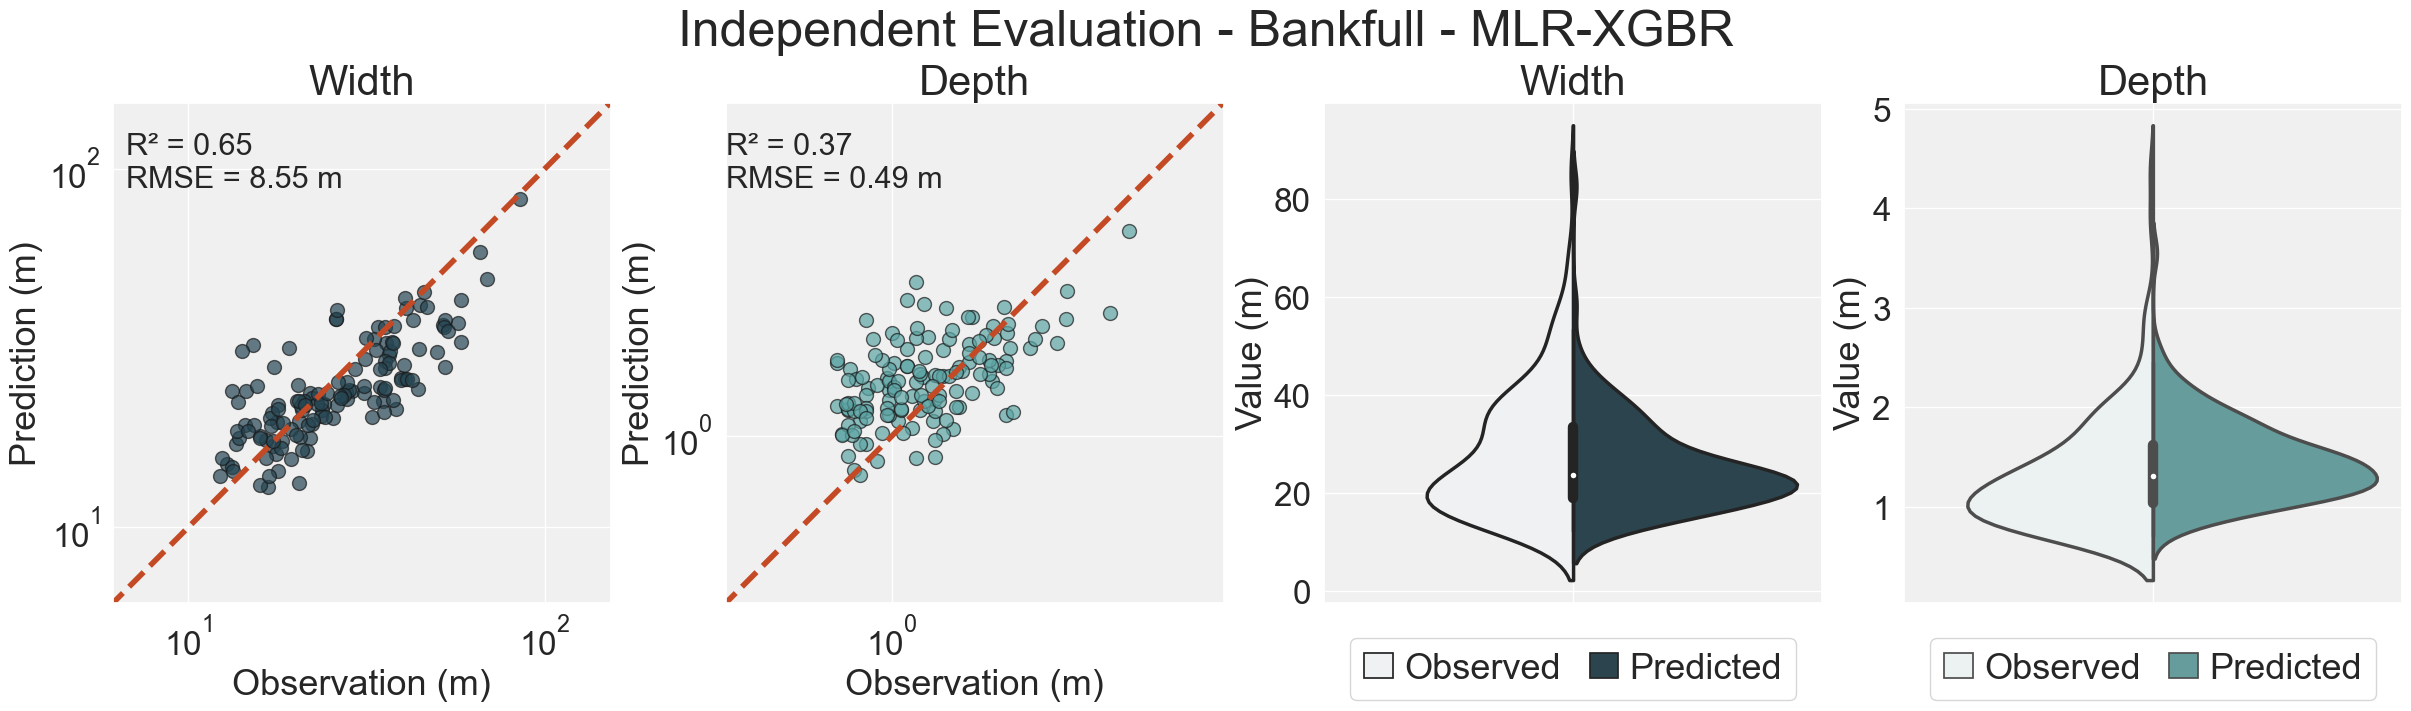

In [7]:
Scatter_Violin_Plots(df_Final['bnk_width_obs'], df_Final['bnk_width_pre_mlrxgb'], df_Final['bnk_depth_obs'], df_Final['bnk_depth_pre_mlrxgb'], "Observation (m)", "Prediction (m)",  "Value (m)", "Width", "Depth", "Independent Evaluation - Bankfull - MLR-XGBR", "R\N{SUPERSCRIPT TWO} = 0.65\nRMSE = 8.55 m", "R\N{SUPERSCRIPT TWO} = 0.37\nRMSE = 0.49 m")

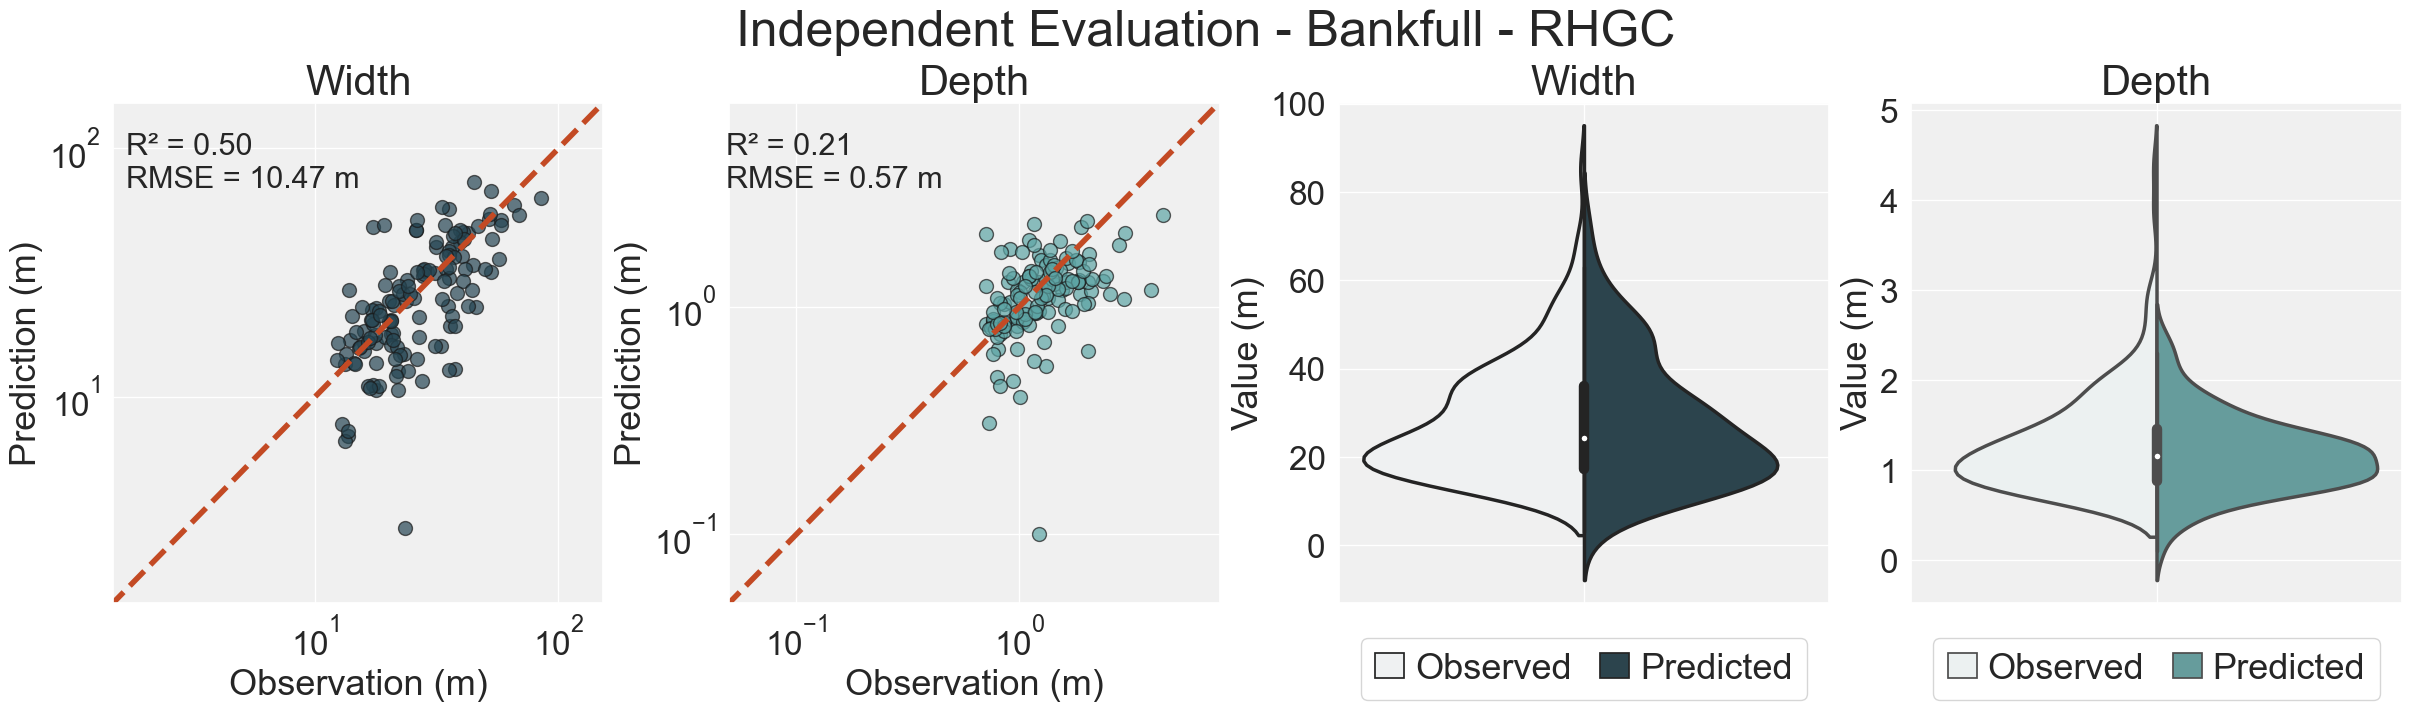

In [8]:
Scatter_Violin_Plots(df_Final['bnk_width_obs'], df_Final['bnk_width_pre_RHGC'], df_Final['bnk_depth_obs'], df_Final['bnk_depth_pre_RHGC'], "Observation (m)", "Prediction (m)",  "Value (m)", "Width", "Depth", "Independent Evaluation - Bankfull - RHGC", "R\N{SUPERSCRIPT TWO} = 0.50\nRMSE = 10.47 m", "R\N{SUPERSCRIPT TWO} = 0.21\nRMSE = 0.57 m")